In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import cm

# classification code

In [4]:
# classification code

def sigmoid(x, margin=0):
    """
    sigmoid function with margins: 
    for x -> -infty: f -> margin
    for x ->  infty: f -> 1-margin
    
    why the margins? To avoid log(0) in logarithmic loss
    """
    return (1-2*margin) / (1 + np.exp(-x)) + margin


def forward(X,w, margin=0):
    """
    computes the forward prediction for a sigmoid activation function as sigmoid(X*w)
    
    parameters
    ----------
    X: 2d-array
        the feature values (i.e. the input for the prediction)
        the 0th column shouls be ones x[:,0]=1 (dummy weights for the bias)
        x.shape[1] must equal len(w)
    w: 1d-array 
        the weights, where w[0] is the bias
        number of columns of x must equal len(w)
    
    returns:
    --------
    y_hat: array 
        the predictions, i.e. the predicted numbers of pizzas that will be ordered
        the dimensions of y are those of x    
    """
    my_X = X.astype(np.float64) # cast to float128 for increased precision
    weighted_sum = np.matmul(X.astype(np.float64),w) # linear model 
    return sigmoid(weighted_sum, margin)  # return sigmoid thereof
    

def classify(X,w):
    return np.round(forward(X,w))


def log_loss(y_hat, y):
    a = y * np.log(y_hat)
    b = (1-y) * np.log(1-y_hat)
    return -np.average(a+b)


def grad_log_loss(X, y, w):
    """
    gradient vektor of logarithmic loss
    
    parameters:
    -----------
    X: 2d-array
        the feature values (i.e. the input for the prediction)
        the 0th column shouls be ones x[:,0]=1 (dummy weights for the bias) 
    y: 1d-array
        the ground truth
        len(y) must equal number of columns of x 
    w: 1d-array 
        the weights, where w[0] is the bias
        len(w) number of columns of x (TODO that is checked)
    """
    
    return np.matmul(X.T, forward(X, w) - y) / X.shape[0]


def train(X, y, lr=0.001, max_iterations=10000, w0=None):
    if w0 is None:
        w = np.zeros((X.shape[1],1))
    else:
        w = w0
    
    ws = []
    losses = []
    success_rates = []
    
    for i in range(max_iterations):
    
        if 1: # save quantities during training
            ws.append(w)

            current_loss = log_loss(forward(X, w), y)
            losses.append(current_loss)        

            current_sr = test(X, y, w)
            success_rates.append(current_sr)        
        
        this_grad = grad_log_loss(X, y, w)
        w = w - this_grad * lr
        
        if i%100 == 0:
            print("Iteration %4d: Loss: %.20f" % (i, log_loss(forward(X, w), y)) )
        
        if 0:#log_loss(forward(x, w), y) >= current_loss:            
            return [w, current_loss, i, ws, losses]
        
    print('Warning: maximum number of iterations reached')
    return [w, ws, losses, success_rates]


def test(X, Y, w):
    num_examples = X.shape[0]
    results = classify(X,w)
    num_correct_results = np.sum(results == Y)
    success_rate = num_correct_results / num_examples
    #print('Success rate = {:.3f}'.format(success_rate))
    return success_rate




### plot function

In [5]:
def plotbin(x, y, w=None):
    """
    visualizes two-feature binary data:
    - all data points in feature space, 
    - label==0 as black crosses, label==1 as red circles
    if w is not None also the following is displayed
    - success rate: # correct classifications / # examples
    - decision boundary
    - logarithmic loss
    
    x: 2d array
        feature values, len(x1) = number of examples
        x[:,0] are ones
        x[:,1] feature 1 values
        x[:,2] feature 2 values
    y: array-like
        label values, must be 0 or 1
    w: 2d array-like
        weights of a trained linear model
        [b, w1, w2], bias b is in first place
        default = None
        if w is not None the decision boundarz of the linear model is plotted
    """
    x1 = x[:,1]
    x2 = x[:,2]
    fig = plt.figure(figsize=(4,4))
    for i in range(len(x1)):
        if y[i] == 0:
            plt.plot(x1[i], x2[i], 'k+')
        else:
            plt.plot(x1[i], x2[i], 'ro')
    #plt.xlabel('feature 1')
    #plt.ylabel('feature 2')
    plt.xlabel('feature 1: Tee Ziehzeit in s')
    plt.ylabel('feature 2: Zuckermenge in Loeffeln')
    
    if w is not None:
        # success rate
        success_rate = test(x, y, w)
        
        # log loss
        loss = log_loss(forward(x,w), y)
        
        # decision boundary
        [b, w1, w2] = w[:,0]
        x1_line = [np.min(x1), np.max(x1)]
        x2_line = [-b/w2 - w1/w2*x1_line[0], -b/w2 - w1/w2*x1_line[1]]
        plt.plot(x1_line, x2_line, '--k')
        x1_margin = (np.max(x1) - np.min(x1))/10
        x2_margin = (np.max(x2) - np.min(x2))/10
        plt.axis([np.min(x1)-x1_margin, np.max(x1)+x1_margin, np.min(x2)-x2_margin, np.max(x2)+x2_margin])
        
        plt.title('Success rate = {:.1f}% \nlog loss = {:.3f}'.format(success_rate*100, loss))

# Load data

In [8]:
x1, x2, y = np.loadtxt('../data/rib_set2.csv', skiprows=1, unpack=True)
x = np.column_stack((np.ones(x1.size), x1, x2)) # add a column of ones in the front
# column 1: ones
# column 2: feature 1
# column 3: feature 2

y = y.reshape(-1, 1) # cast array into a matrix
# binary label (0 or 1)

print(y)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]]


# Optional: generate your own data

In [9]:
# np.random.normal(mean, sigma, (num_samples, dim))
if 1:
    # Gaussian distribution
    if 0:
        # data cloud with label = 0
        num0 = 40         # number of examples
        [c0x, c0y] = [0,0] # center 
        [s0x, s0y] = [1,1] # standard deviation in x and y direction 

        # data cloud with label = 1
        num1 = 0
        [c1x, c1y] = [3,-3] # center 
        [s1x, s1y] = [1,1] # standard deviation in x and y direction 

        x0 = np.random.normal(c0x, s0x, (num0, 1))
        y0 = np.random.normal(c0y, s0y, (num0, 1))
        x1 = np.random.normal(c1x, s1x, (num0, 1))
        y1 = np.random.normal(c1y, s1y, (num0, 1))
        
    # uniform distribution
    if 1:
        # data cloud with label = 0
        num0 = 20         # number of examples
        [minx, maxx] = [0,8] # center 
        [miny, maxy] = [0,3] # standard deviation in x and y direction 
        
        x0 = np.random.uniform(minx, maxx, (num0, 1))
        y0 = np.random.uniform(miny, maxy, (num0, 1))

    x = np.zeros((num0, 2))
    y = np.zeros((num0, 1)) # ATTENTION: here, y is the label vector, not the y-component of the features
    for i in range(num0):
        x[i,:] = [x0[i], y0[i]]
        y[i,0] = 0
    
    
    # add ones as a first column to x
    x = np.column_stack((np.ones(len(x)), x[:,0], x[:,1]))
    
    # optional: modify labels
    if 1:
        for i in range(len(y)):
            a = x[i,1]
            b = x[i,2]
            y[i,0] = np.exp(-(((a-3)**2 + (b-1)**2))/(3*1**2))
            y = np.round(y)
    
    
    plotbin(x,y)

ValueError: setting an array element with a sequence. The requested array would exceed the maximum number of dimension of 1.

In [10]:
# optional: save data to text file
if 1:
    a = np.column_stack((x[:,1], x[:,2], y[:,0]))
    np.savetxt("myset.csv", a, delimiter='\t', header = 'my set')


IndexError: index 2 is out of bounds for axis 1 with size 2

In [414]:
x0

array([[7.75087059],
       [3.98780973],
       [4.84463867],
       [5.12458922],
       [6.74339426],
       [1.21106375],
       [2.99171756],
       [2.35091749],
       [3.68025283],
       [6.32688178],
       [1.61216369],
       [7.53562526],
       [4.39698569],
       [2.95509372],
       [7.69528498],
       [0.06930974],
       [6.58751735],
       [4.49886685],
       [2.27778947],
       [2.84146884],
       [6.99979528],
       [0.64847152],
       [5.6311301 ],
       [6.04752405],
       [4.8339195 ],
       [2.92352716],
       [0.12286686],
       [7.25842201],
       [7.89456299],
       [1.22383492],
       [0.08711745],
       [7.08252118],
       [1.57963853],
       [2.99697245],
       [7.97754184],
       [1.37884522],
       [3.7249223 ],
       [7.81153329],
       [1.87030921],
       [0.74137465]])

# Apply your code

Data was loaded above

In [11]:
# plot data
plotbin(x,y)

IndexError: index 2 is out of bounds for axis 1 with size 2

## now train a model

The below cells do the following: 

- train a model
- plot the data alongside 
    - decision boundary
    - final success rate (fraction of correct classifications)
    - final loss

You may have to play aroud with the learning rate and the number of iterations

*Hint:* Start with a low number of iterations (100 or 1000), then gradually increase as needed

In [12]:
[w, ws, losses, success_rates] = train(x, y, lr=0.2, max_iterations=1000)

Iteration    0: Loss: 0.69314718055994528623
Iteration  100: Loss: 0.69314718055994528623
Iteration  200: Loss: 0.69314718055994528623
Iteration  300: Loss: 0.69314718055994528623
Iteration  400: Loss: 0.69314718055994528623
Iteration  500: Loss: 0.69314718055994528623
Iteration  600: Loss: 0.69314718055994528623
Iteration  700: Loss: 0.69314718055994528623
Iteration  800: Loss: 0.69314718055994528623
Iteration  900: Loss: 0.69314718055994528623


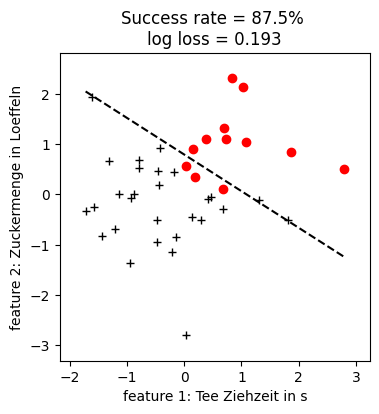

In [11]:
# plot with the decision boundary
plotbin(x, y, w)

# The lowest loss does not necessarily yield the largest number of correct classifications 

Text(0.5, 0, 'iterations')

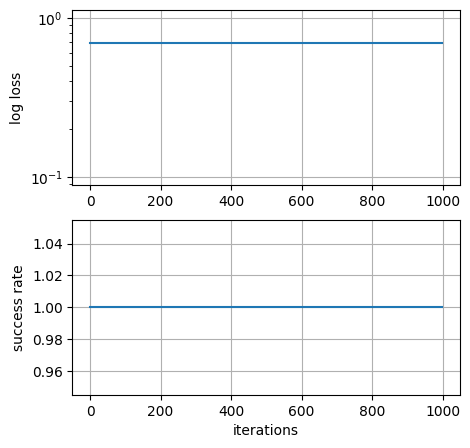

In [13]:
plt.figure(figsize=(5,5))

plt.subplot(2,1,1)
plt.semilogy(losses)
plt.grid()
plt.ylabel('log loss')

plt.subplot(2,1,2)
plt.plot(success_rates)
plt.grid()
plt.ylabel('success rate')
plt.xlabel('iterations')